In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import(accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [3]:
df = pd.read_csv('/content/BankNote_Authentication.csv')

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


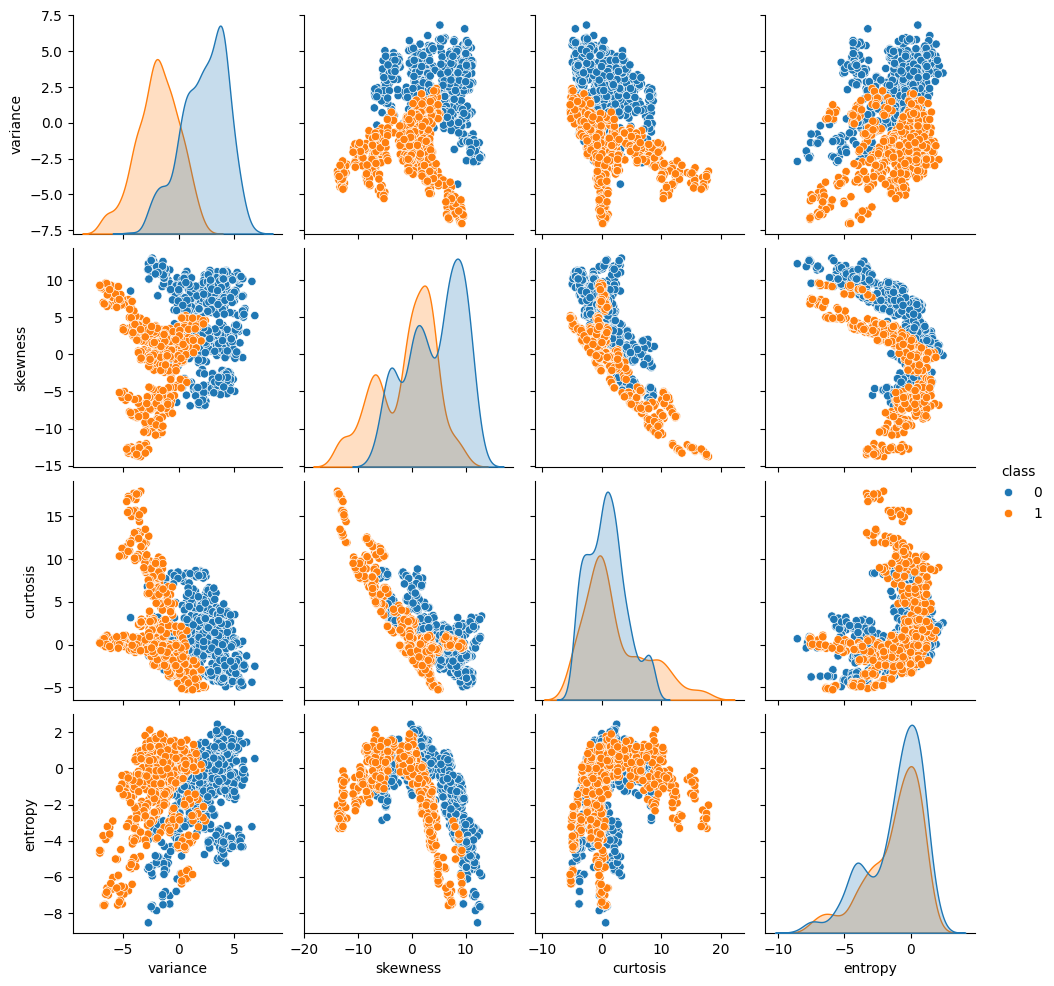

In [5]:
sns.pairplot(df,hue='class',vars=['variance','skewness','curtosis','entropy'])

In [6]:
X=df.drop('class',axis=1)
y=df['class']

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [8]:
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [9]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))

In [10]:
model = Sequential([
    Dense(32,activation='relu',input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(16,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 705 (2.75 KB)

 Trainable params: 705 (2.75 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
es=EarlyStopping(monitor="val_loss",patience=8,restore_best_weights=True)
ckpt=ModelCheckpoint('banknote_model.h5',monitor='val_loss',save_best_only=True)

In [14]:
history=model.fit(X_train,y_train,validation_split=0.2,epochs=100,batch_size=32,callbacks=[es,ckpt],verbose=2)

Epoch 1/100


28/28 - 2s - 67ms/step - accuracy: 0.5667 - loss: 0.6795 - val_accuracy: 0.6636 - val_loss: 0.6071
Epoch 2/100


28/28 - 0s - 5ms/step - accuracy: 0.7275 - loss: 0.5753 - val_accuracy: 0.8455 - val_loss: 0.5167
Epoch 3/100


28/28 - 0s - 6ms/step - accuracy: 0.8290 - loss: 0.4873 - val_accuracy: 0.8909 - val_loss: 0.4355
Epoch 4/100


28/28 - 0s - 6ms/step - accuracy: 0.8803 - loss: 0.4024 - val_accuracy: 0.9182 - val_loss: 0.3519
Epoch 5/100


28/28 - 0s - 6ms/step - accuracy: 0.9111 - loss: 0.3264 - val_accuracy: 0.9364 - val_loss: 0.2667
Epoch 6/100


28/28 - 0s - 6ms/step - accuracy: 0.9361 - loss: 0.2530 - val_accuracy: 0.9409 - val_loss: 0.1965
Epoch 7/100


28/28 - 0s - 6ms/step - accuracy: 0.9487 - loss: 0.1944 - val_accuracy: 0.9682 - val_loss: 0.1463
Epoch 8/100


28/28 - 0s - 6ms/step - accuracy: 0.9544 - loss: 0.1518 - val_accuracy: 0.9773 - val_loss: 0.1114
Epoch 9/100


28/28 - 0s - 6ms/step - accuracy: 0.9578 - loss: 0.1234 - val_accuracy: 0.9818 - val_loss: 0.0877
Epoch 10/100


28/28 - 0s - 6ms/step - accuracy: 0.9692 - loss: 0.1137 - val_accuracy: 0.9773 - val_loss: 0.0726
Epoch 11/100


28/28 - 0s - 6ms/step - accuracy: 0.9704 - loss: 0.0975 - val_accuracy: 0.9818 - val_loss: 0.0608
Epoch 12/100


28/28 - 0s - 6ms/step - accuracy: 0.9749 - loss: 0.0818 - val_accuracy: 0.9864 - val_loss: 0.0532
Epoch 13/100


28/28 - 0s - 6ms/step - accuracy: 0.9772 - loss: 0.0687 - val_accuracy: 0.9864 - val_loss: 0.0456
Epoch 14/100


28/28 - 0s - 6ms/step - accuracy: 0.9749 - loss: 0.0741 - val_accuracy: 0.9909 - val_loss: 0.0401
Epoch 15/100


28/28 - 0s - 6ms/step - accuracy: 0.9795 - loss: 0.0613 - val_accuracy: 0.9909 - val_loss: 0.0373
Epoch 16/100


28/28 - 0s - 10ms/step - accuracy: 0.9795 - loss: 0.0544 - val_accuracy: 0.9909 - val_loss: 0.0330
Epoch 17/100


28/28 - 0s - 10ms/step - accuracy: 0.9795 - loss: 0.0521 - val_accuracy: 0.9909 - val_loss: 0.0299
Epoch 18/100


28/28 - 0s - 9ms/step - accuracy: 0.9863 - loss: 0.0454 - val_accuracy: 0.9909 - val_loss: 0.0273
Epoch 19/100


28/28 - 0s - 9ms/step - accuracy: 0.9875 - loss: 0.0413 - val_accuracy: 0.9909 - val_loss: 0.0256
Epoch 20/100


28/28 - 0s - 10ms/step - accuracy: 0.9875 - loss: 0.0424 - val_accuracy: 0.9909 - val_loss: 0.0241
Epoch 21/100


28/28 - 0s - 8ms/step - accuracy: 0.9840 - loss: 0.0435 - val_accuracy: 0.9909 - val_loss: 0.0213
Epoch 22/100


28/28 - 0s - 12ms/step - accuracy: 0.9829 - loss: 0.0377 - val_accuracy: 0.9955 - val_loss: 0.0193
Epoch 23/100


28/28 - 0s - 9ms/step - accuracy: 0.9909 - loss: 0.0311 - val_accuracy: 0.9955 - val_loss: 0.0187
Epoch 24/100


28/28 - 0s - 10ms/step - accuracy: 0.9829 - loss: 0.0371 - val_accuracy: 0.9955 - val_loss: 0.0184
Epoch 25/100


28/28 - 0s - 8ms/step - accuracy: 0.9897 - loss: 0.0280 - val_accuracy: 0.9955 - val_loss: 0.0168
Epoch 26/100


28/28 - 0s - 6ms/step - accuracy: 0.9932 - loss: 0.0284 - val_accuracy: 0.9955 - val_loss: 0.0159
Epoch 27/100


28/28 - 0s - 6ms/step - accuracy: 0.9909 - loss: 0.0231 - val_accuracy: 0.9955 - val_loss: 0.0139
Epoch 28/100


28/28 - 0s - 6ms/step - accuracy: 0.9954 - loss: 0.0219 - val_accuracy: 1.0000 - val_loss: 0.0130
Epoch 29/100


28/28 - 0s - 11ms/step - accuracy: 0.9943 - loss: 0.0251 - val_accuracy: 1.0000 - val_loss: 0.0120
Epoch 30/100
28/28 - 0s - 5ms/step - accuracy: 0.9966 - loss: 0.0224 - val_accuracy: 1.0000 - val_loss: 0.0121
Epoch 31/100


28/28 - 0s - 5ms/step - accuracy: 0.9886 - loss: 0.0243 - val_accuracy: 1.0000 - val_loss: 0.0114
Epoch 32/100


28/28 - 0s - 5ms/step - accuracy: 0.9909 - loss: 0.0238 - val_accuracy: 1.0000 - val_loss: 0.0102
Epoch 33/100
28/28 - 0s - 5ms/step - accuracy: 0.9863 - loss: 0.0267 - val_accuracy: 1.0000 - val_loss: 0.0103
Epoch 34/100


28/28 - 0s - 6ms/step - accuracy: 0.9943 - loss: 0.0210 - val_accuracy: 1.0000 - val_loss: 0.0092
Epoch 35/100


28/28 - 0s - 6ms/step - accuracy: 0.9954 - loss: 0.0189 - val_accuracy: 1.0000 - val_loss: 0.0083
Epoch 36/100


28/28 - 0s - 6ms/step - accuracy: 0.9977 - loss: 0.0134 - val_accuracy: 1.0000 - val_loss: 0.0075
Epoch 37/100


28/28 - 0s - 6ms/step - accuracy: 0.9966 - loss: 0.0133 - val_accuracy: 1.0000 - val_loss: 0.0070
Epoch 38/100


28/28 - 0s - 6ms/step - accuracy: 0.9977 - loss: 0.0147 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 39/100
28/28 - 0s - 5ms/step - accuracy: 0.9943 - loss: 0.0169 - val_accuracy: 1.0000 - val_loss: 0.0065
Epoch 40/100


28/28 - 0s - 6ms/step - accuracy: 0.9989 - loss: 0.0130 - val_accuracy: 1.0000 - val_loss: 0.0061
Epoch 41/100
28/28 - 0s - 11ms/step - accuracy: 0.9977 - loss: 0.0153 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 42/100


28/28 - 0s - 11ms/step - accuracy: 0.9977 - loss: 0.0144 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 43/100
28/28 - 0s - 5ms/step - accuracy: 0.9943 - loss: 0.0136 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 44/100
28/28 - 0s - 5ms/step - accuracy: 0.9977 - loss: 0.0115 - val_accuracy: 1.0000 - val_loss: 0.0053
Epoch 45/100


28/28 - 0s - 6ms/step - accuracy: 0.9932 - loss: 0.0196 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 46/100


28/28 - 0s - 11ms/step - accuracy: 0.9966 - loss: 0.0104 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 47/100


28/28 - 0s - 6ms/step - accuracy: 0.9943 - loss: 0.0133 - val_accuracy: 1.0000 - val_loss: 0.0040
Epoch 48/100


28/28 - 0s - 6ms/step - accuracy: 0.9966 - loss: 0.0122 - val_accuracy: 1.0000 - val_loss: 0.0038
Epoch 49/100


28/28 - 0s - 6ms/step - accuracy: 0.9977 - loss: 0.0112 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 50/100
28/28 - 0s - 5ms/step - accuracy: 0.9977 - loss: 0.0107 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 51/100
28/28 - 0s - 5ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 52/100
28/28 - 0s - 5ms/step - accuracy: 0.9943 - loss: 0.0149 - val_accuracy: 1.0000 - val_loss: 0.0037
Epoch 53/100


28/28 - 0s - 6ms/step - accuracy: 0.9966 - loss: 0.0094 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 54/100
28/28 - 0s - 5ms/step - accuracy: 0.9977 - loss: 0.0094 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 55/100
28/28 - 0s - 5ms/step - accuracy: 0.9989 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 56/100


28/28 - 0s - 6ms/step - accuracy: 0.9966 - loss: 0.0103 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 57/100


28/28 - 0s - 6ms/step - accuracy: 0.9977 - loss: 0.0087 - val_accuracy: 1.0000 - val_loss: 0.0026
Epoch 58/100
28/28 - 0s - 11ms/step - accuracy: 0.9989 - loss: 0.0087 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 59/100


28/28 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0063 - val_accuracy: 1.0000 - val_loss: 0.0025
Epoch 60/100
28/28 - 0s - 5ms/step - accuracy: 0.9989 - loss: 0.0057 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 61/100


28/28 - 0s - 6ms/step - accuracy: 0.9989 - loss: 0.0062 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 62/100


28/28 - 0s - 6ms/step - accuracy: 0.9989 - loss: 0.0065 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 63/100


28/28 - 0s - 6ms/step - accuracy: 0.9989 - loss: 0.0067 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 64/100
28/28 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 65/100


28/28 - 0s - 7ms/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 66/100
28/28 - 0s - 5ms/step - accuracy: 0.9989 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 67/100


28/28 - 0s - 6ms/step - accuracy: 0.9977 - loss: 0.0076 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 68/100


28/28 - 0s - 6ms/step - accuracy: 0.9966 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 69/100


28/28 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 70/100
28/28 - 0s - 11ms/step - accuracy: 0.9989 - loss: 0.0102 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 71/100
28/28 - 0s - 5ms/step - accuracy: 0.9977 - loss: 0.0053 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 72/100
28/28 - 0s - 5ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 73/100
28/28 - 0s - 5ms/step - accuracy: 0.9954 - loss: 0.0086 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 74/100


28/28 - 0s - 6ms/step - accuracy: 0.9989 - loss: 0.0052 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 75/100


28/28 - 0s - 5ms/step - accuracy: 0.9977 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 76/100
28/28 - 0s - 5ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 77/100
28/28 - 0s - 6ms/step - accuracy: 0.9977 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 78/100
28/28 - 0s - 5ms/step - accuracy: 0.9989 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 79/100
28/28 - 0s - 5ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 80/100
28/28 - 0s - 5ms/step - accuracy: 0.9989 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 81/100
28/28 - 0s - 5ms/step - accuracy: 0.9989 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 82/100


28/28 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 83/100
28/28 - 0s - 7ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 84/100
28/28 - 0s - 8ms/step - accuracy: 0.9989 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0014
Epoch 85/100
28/28 - 0s - 7ms/step - accuracy: 0.9989 - loss: 0.0046 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 86/100
28/28 - 0s - 7ms/step - accuracy: 0.9989 - loss: 0.0049 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 87/100
28/28 - 0s - 7ms/step - accuracy: 0.9989 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 88/100
28/28 - 0s - 8ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 89/100


28/28 - 0s - 8ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 90/100


28/28 - 0s - 12ms/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 8.1345e-04
Epoch 91/100


28/28 - 0s - 9ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 1.0000 - val_loss: 7.5073e-04
Epoch 92/100


28/28 - 0s - 12ms/step - accuracy: 0.9989 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 6.6545e-04
Epoch 93/100
28/28 - 0s - 5ms/step - accuracy: 1.0000 - loss: 0.0029 - val_accuracy: 1.0000 - val_loss: 7.1334e-04
Epoch 94/100


28/28 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 1.0000 - val_loss: 6.2313e-04
Epoch 95/100


28/28 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 6.2095e-04
Epoch 96/100


28/28 - 0s - 6ms/step - accuracy: 0.9989 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 5.9955e-04
Epoch 97/100
28/28 - 0s - 5ms/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 1.0000 - val_loss: 6.0879e-04
Epoch 98/100


28/28 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 5.8815e-04
Epoch 99/100
28/28 - 0s - 5ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 6.1159e-04
Epoch 100/100
28/28 - 0s - 5ms/step - accuracy: 0.9989 - loss: 0.0039 - val_accuracy: 1.0000 - val_loss: 6.3153e-04


In [15]:
model.save('banknote_model_final.h5')

In [16]:
y_pred_prob = model.predict(X_test).ravel()
y_pred=(y_pred_prob>0.5).astype(int)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [17]:
acc = accuracy_score(y_test,y_pred)
print(acc)

1.0


In [18]:
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_prob)
print(f"\nTest Accuracy: {acc:.4f}")
print(f"Test ROC AUC:  {auc:.4f}\n")
print("Classification report:\n", classification_report(y_test, y_pred))



Test Accuracy: 1.0000
Test ROC AUC:  1.0000

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00       122

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



In [19]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n", cm)

Confusion matrix:
 [[153   0]
 [  0 122]]


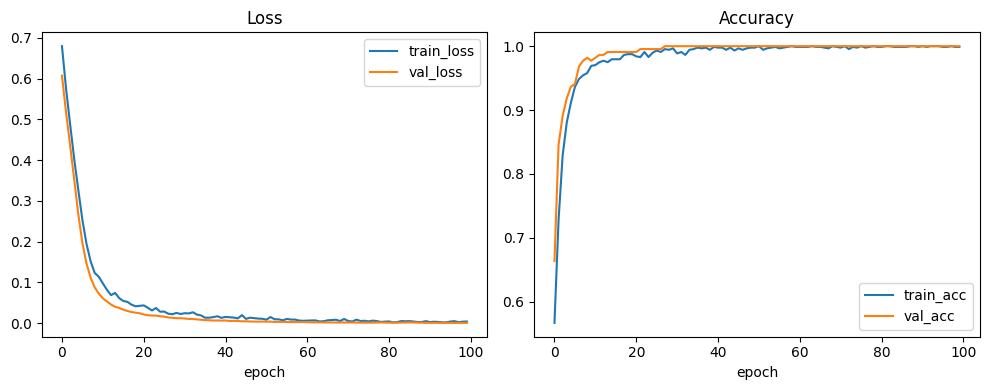

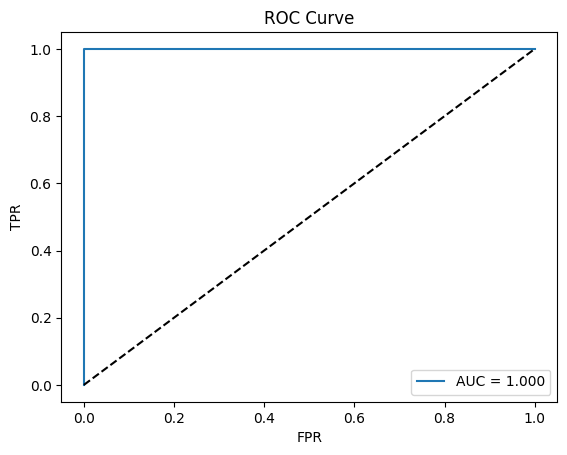

In [20]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.tight_layout()
plt.savefig("learning_curves.png")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.savefig("roc_curve.png")
plt.show()